In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset
dataset=pd.read_csv("Facebook_Marketplace_data.csv")

In [4]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# converting status_published to datetime
dataset["status_published"]=pd.to_datetime(dataset["status_published"])
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


status_published and num_reactions relation 

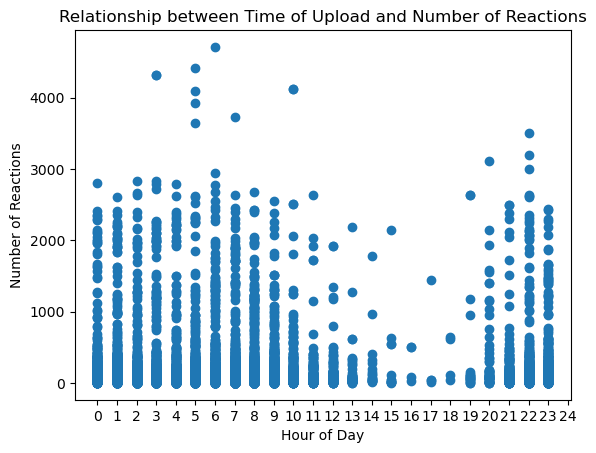

In [7]:

dataset['hour_of_day'] = dataset['status_published'].dt.hour

plt.scatter(dataset['hour_of_day'], dataset['num_reactions'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reactions')
plt.title('Relationship between Time of Upload and Number of Reactions')
plt.xticks(range(25))
plt.show()

relation between num_reactions and engagement matrics

<BarContainer object of 8 artists>

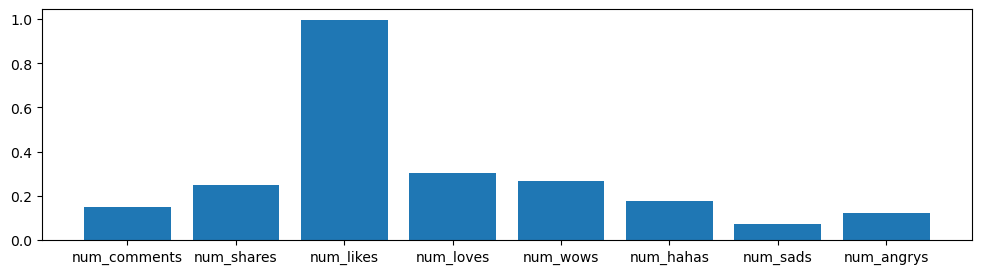

In [94]:
corr_comments=dataset['num_reactions'].corr(dataset['num_comments'])
corr_shares=dataset['num_reactions'].corr(dataset['num_shares'])
corr_likes=dataset['num_reactions'].corr(dataset['num_likes'])
corr_loves=dataset['num_reactions'].corr(dataset['num_loves'])
corr_wows=dataset['num_reactions'].corr(dataset['num_wows'])
corr_hahas=dataset['num_reactions'].corr(dataset['num_hahas'])
corr_sads=dataset['num_reactions'].corr(dataset['num_sads'])
corr_angry=dataset['num_reactions'].corr(dataset['num_angrys'])


plt.figure(figsize=(12,3))
plt.bar(['num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys'],
        [corr_comments,corr_shares,corr_likes,corr_loves,corr_wows,corr_hahas,corr_sads,corr_angry])

In [97]:
corr_comments,corr_shares,corr_likes,corr_loves,corr_wows,corr_hahas,corr_sads,corr_angry

(np.float64(0.1508429034421764),
 np.float64(0.250722516628319),
 np.float64(0.9949233703319166),
 np.float64(0.3050027812867103),
 np.float64(0.26775181934416625),
 np.float64(0.17602803596145908),
 np.float64(0.07513801038987962),
 np.float64(0.12432605822332352))

 Applying k-Means clustering 

In [74]:
#separating colums for clustering
x=dataset[['status_type','num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

In [95]:
# label encoding status_types column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])

In [96]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


applying elbow method

In [77]:
from sklearn.cluster import KMeans

In [78]:
wcss=[]
for i in range(2,20):
    knn=KMeans(n_clusters=i,init='k-means++')
    knn.fit(x)
    wcss.append(knn.inertia_)
wcss    

[4986397875.914607,
 2735345294.940777,
 2003257465.948973,
 1470355886.017136,
 1205252490.100826,
 1057048483.6676027,
 750355782.3379571,
 621409959.4121174,
 534983991.8314899,
 461376042.6536668,
 386191627.6539831,
 361253297.8782476,
 299297597.19947815,
 277323919.1258673,
 275691987.78260404,
 235287773.24762124,
 219450746.2645776,
 201680397.25031006]

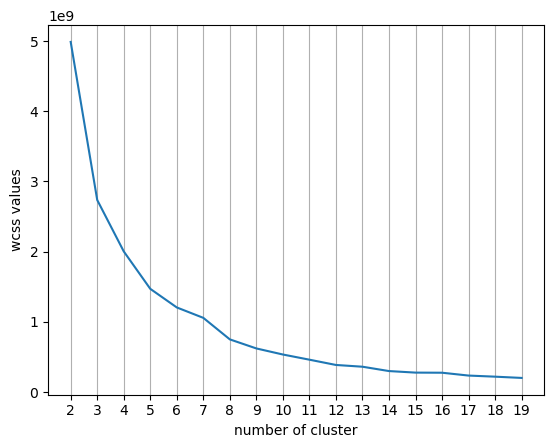

In [79]:
plt.plot(range(2,20),wcss)
plt.xlabel('number of cluster')
plt.xticks(range(2,20))
plt.ylabel('wcss values')
plt.grid(axis='x')
plt.show()

In [80]:
dataset['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [81]:
avg_reactions=dataset.groupby('status_type')['num_reactions'].mean().reset_index()
avg_comments=dataset.groupby('status_type')['num_comments'].mean().reset_index()
avg_shares=dataset.groupby('status_type')['num_shares'].mean().reset_index()

In [82]:
avg_reactions

,status_type,num_reactions
0,link,370.142857
1,photo,181.290345
2,status,438.783562
3,video,283.409597


In [83]:
avg_comments

,status_type,num_comments
0,link,5.698413
1,photo,15.993470
2,status,36.238356
3,video,642.478149


In [84]:
avg_shares

,status_type,num_shares
0,link,4.396825
1,photo,2.553871
2,status,2.558904
3,video,115.679949
